In [60]:
import pandas as pd

#bước 1: đọc dữ liệu
df = pd.read_csv("Techcombank Stock Price History.csv",parse_dates=['Date'], index_col='Date')

df.head()


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-06-29,"35,000.0","34,100.0","35,100.0","34,000.0",43.21M,3.09%
2025-06-22,"33,950.0","33,600.0","34,750.0","33,400.0",79.63M,-0.15%
2025-06-15,"34,000.0","31,000.0","34,850.0","30,950.0",99.26M,8.97%
2025-06-08,"31,200.0","30,300.0","31,500.0","29,750.0",93.91M,2.97%
2025-06-01,"30,300.0","30,400.0","31,900.0","30,200.0",97.64M,-0.49%


In [62]:
#bước 2:tiền xử lý dữ liệu
#1. chuyển cột date thành datetime và đặt làm index
#df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
#df.set_index('Date', inplace=True)

df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-06-30,"23,500.0","23,100.0","23,550.0","22,650.0",42.51M,0.64%
2024-07-07,"22,800.0","23,500.0","23,500.0","22,800.0",49.32M,-2.98%
2024-07-14,"23,400.0","22,850.0","24,200.0","22,550.0",69.74M,2.63%
2024-07-21,"22,750.0","23,300.0","23,800.0","22,550.0",52.40M,-2.78%
2024-07-28,"23,500.0","22,750.0","24,250.0","21,650.0",13.70M,3.30%


In [64]:
#2.làm sạch dữ liệu
#2.1. làm sạch các cột số có dấu phẩy
cols = ['Price', 'Open', 'High', 'Low']
for col in cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


#2.2. làm sạch cột vol (chuyển về dạng số)
def parse_volume(x):
    x = str(x).replace('M', '').replace(',', '')
    return float(x) * 1_000_000

df['Volume'] = df['Vol.'].apply(parse_volume)

df['Volume'] = df['Vol.'].apply(parse_volume)

#2.3. làm sạch cột chang%
df['Change_pct'] = df['Change %'].str.replace('%', '').astype(float)

df.head()




,Price,Open,High,Low,Vol.,Change %,Volume,Change_pct
Date,,,,,,,,
2024-06-30,23500.0,23100.0,23550.0,22650.0,42.51M,0.64%,42510000.0,0.64
2024-07-07,22800.0,23500.0,23500.0,22800.0,49.32M,-2.98%,49320000.0,-2.98
2024-07-14,23400.0,22850.0,24200.0,22550.0,69.74M,2.63%,69740000.0,2.63
2024-07-21,22750.0,23300.0,23800.0,22550.0,52.40M,-2.78%,52400000.0,-2.78
2024-07-28,23500.0,22750.0,24250.0,21650.0,13.70M,3.30%,13700000.0,3.30


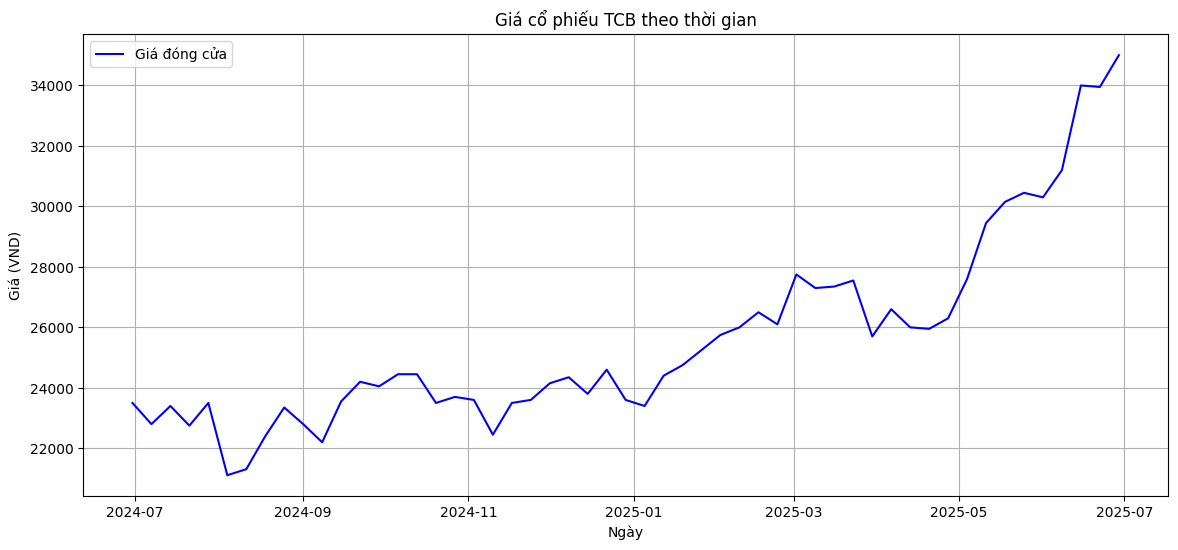

In [68]:
#bước 3:Vẽ biểu đồ giá cổ phiếu
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Price'], label='Giá đóng cửa', color='blue')
plt.title("Giá cổ phiếu TCB theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Giá (VND)")
plt.legend()
plt.grid(True)
plt.show()



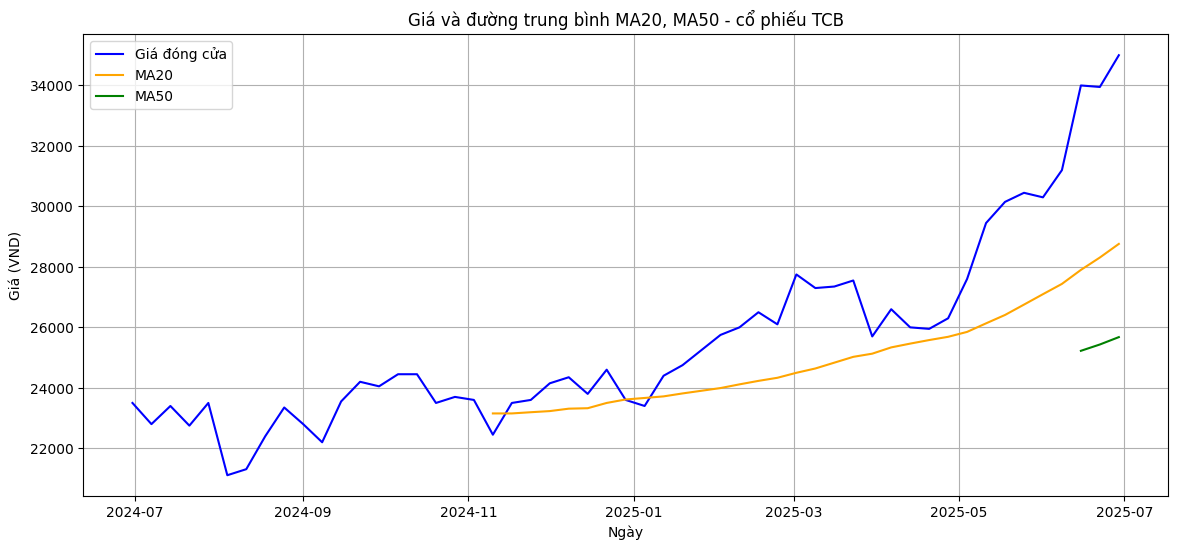

In [70]:
#bước 4: tính MA20, MA50, vẽ cùng giá
#tính đường trung bình động MA
df['MA20'] = df['Price'].rolling(window=20).mean()
df['MA50'] = df['Price'].rolling(window=50).mean()

#vẽ biểu đồ
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Price'], label='Giá đóng cửa', color='blue')
plt.plot(df.index, df['MA20'], label='MA20', color='orange')
plt.plot(df.index, df['MA50'], label='MA50', color='green')
plt.title("Giá và đường trung bình MA20, MA50 - cổ phiếu TCB")
plt.xlabel("Ngày")
plt.ylabel("Giá (VND)")
plt.legend()
plt.grid(True)
plt.show()



In [72]:
!pip install ta


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


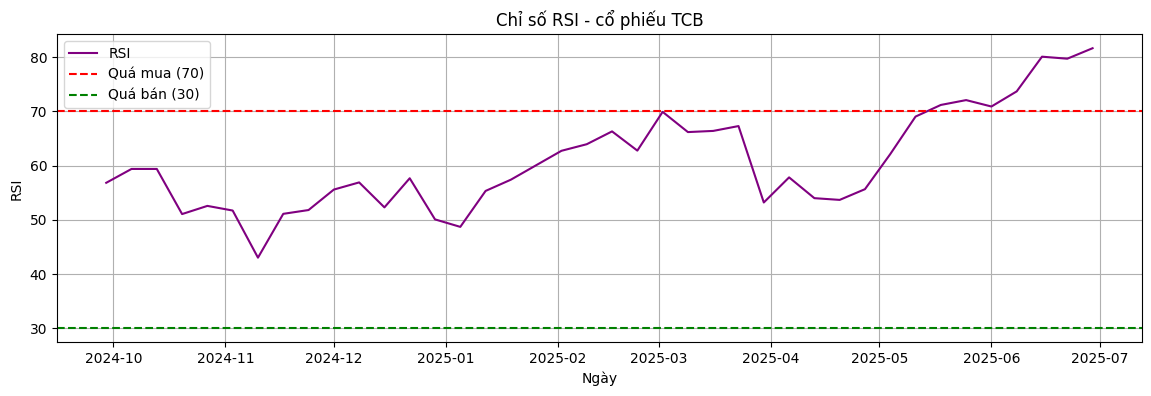

In [73]:
#bước 5: tính PSI  (Relative Strength Index)
import ta

df['RSI'] = ta.momentum.RSIIndicator(close=df['Price']).rsi()

# Vẽ RSI
plt.figure(figsize=(14,4))
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Quá mua (70)')
plt.axhline(30, color='green', linestyle='--', label='Quá bán (30)')
plt.title("Chỉ số RSI - cổ phiếu TCB")
plt.xlabel("Ngày")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()


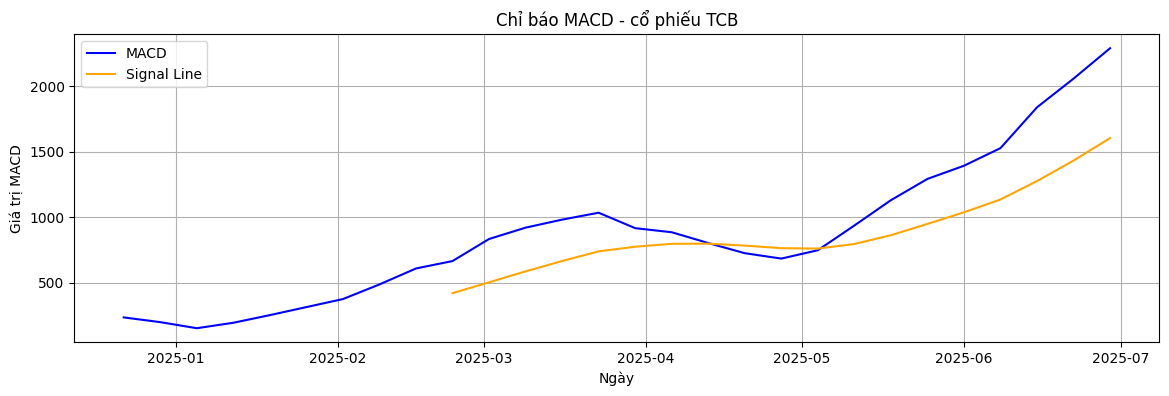

In [76]:
#bước 6: Tính MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(close=df['Price'])
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# Vẽ MACD
plt.figure(figsize=(14,4))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['MACD_Signal'], label='Signal Line', color='orange')
plt.title("Chỉ báo MACD - cổ phiếu TCB")
plt.xlabel("Ngày")
plt.ylabel("Giá trị MACD")
plt.legend()
plt.grid(True)
plt.show()
